# Machine Learning on World Happiness using Python (Year: 2016)

## Setting Up The Environment

Importing packages

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import linear_model

Extraction of Data

In [12]:
happy=pd.read_csv("2016.csv")
happy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
5,Canada,North America and ANZ,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416
7,New Zealand,North America and ANZ,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401
8,Australia,North America and ANZ,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254


## General Analysis Of Data

### Finding Highest Ranked Country In Each Factors

Economy (GDP per Capita)

In [13]:
#Collection Of Data
GDP=happy[['Country', 'Economy (GDP per Capita)']]
#Calculation On Data
Highest_GDP=GDP['Economy (GDP per Capita)'].idxmax()
print("The country with highest GDP is "
      +GDP['Country'][Highest_GDP]
      +", with it's GDP value being "
      +str(round(GDP['Economy (GDP per Capita)'][Highest_GDP], 4))
      +'.')

The country with highest GDP is Qatar, with it's GDP value being 1.8243.


Social Support

In [14]:
#Collection Of Data
Social=happy[['Country', 'Social Support']]
#Calculation On Data
Highest_Social=Social['Social Support'].idxmax()
print("The country with highest Social Support score is "
      +Social['Country'][Highest_Social]
      +", with it's Social Support score being "
      +str(round(Social['Social Support'][Highest_Social], 4))
      +'.')

The country with highest Social Support score is Iceland, with it's Social Support score being 1.1833.


Health (Life Expectancy)

In [15]:
#Collection Of Data
Health=happy[['Country', 'Health (Life Expectancy)']]
#Calculation On Data
Highest_Health=Health['Health (Life Expectancy)'].idxmax()
print("The country with highest Health (Life Expectancy) score is "
      +Health['Country'][Highest_Health]
      +", with it's Health (Life Expectancy) score being "
      +str(round(Health['Health (Life Expectancy)'][Highest_Health], 4))
      +'.')

The country with highest Health (Life Expectancy) score is Hong Kong, with it's Health (Life Expectancy) score being 0.9528.


Freedom

In [16]:
#Collection Of Data
Freedom=happy[['Country', 'Freedom']]
#Calculation On Data
Highest_Freedom=Freedom['Freedom'].idxmax()
print("The country with highest Freedom score is "
      +Freedom['Country'][Highest_Freedom]
      +", with it's Freedom score being "
      +str(round(Freedom['Freedom'][Highest_Freedom], 4))
      +'.')

The country with highest Freedom score is Uzbekistan, with it's Freedom score being 0.6085.


Trust (Government Corruption)

In [17]:
#Collection Of Data
Trust=happy[['Country', 'Trust (Government Corruption)']]
#Calculation On Data
Highest_Trust=Trust['Trust (Government Corruption)'].idxmax()
print("The country with highest Trust score is "
      +Trust['Country'][Highest_Trust]
      +", with it's Trust score being "
      +str(round(Trust['Trust (Government Corruption)'][Highest_Trust], 4))
      +'.')

The country with highest Trust score is Rwanda, with it's Trust score being 0.5052.


Generosity

In [18]:
#Collection Of Data
Generosity=happy[['Country', 'Generosity']]
#Calculation On Data
Highest_Generosity=Generosity['Generosity'].idxmax()
print("The country with highest Generosity score is "
      +Generosity['Country'][Highest_Generosity]
      +", with it's Generosity score being "
      +str(round(Generosity['Generosity'][Highest_Generosity], 4))
      +'.')

The country with highest Generosity score is Myanmar, with it's Generosity score being 0.8197.


### Factors Affecting Happiness Worldwide (Pie Chart)

Calculating Data

In [19]:
Factors = ['Economy (GDP per Capita)', 
           'Social Support', 
           'Health (Life Expectancy)', 
           'Freedom', 
           'Trust (Government Corruption)', 
           'Generosity'
]

Scores = happy.mean(axis=0)
Scores = Scores[2:8]
Scores

Economy (GDP per Capita)         0.953880
Social Support                   0.793621
Health (Life Expectancy)         0.557619
Freedom                          0.370994
Trust (Government Corruption)    0.137624
Generosity                       0.242635
dtype: float64

Creation Of Pie Chart

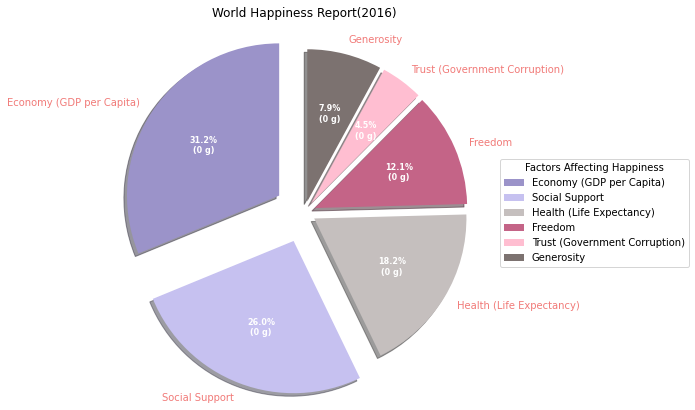

In [20]:
# Creating explode data
explode = (0.2, 0.2, 0.075, 0.075, 0.075, 0.075)
  
# Creating color parameters
colors = ( "#9b93c9", "#c6c1f0", "#c5bfbe",
          "#c46487", "#ffbed1", "#7c7270")
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(
    Scores, 
    autopct = lambda pct: func(pct, Scores),
    explode = explode, 
    labels = Factors,
    shadow = True,
    colors = colors,
    startangle = 90,
    wedgeprops = None,
    textprops = dict(color ="#f17b79")
)

# Adding legend
ax.legend(
    wedges,
    Factors,
    title ="Factors Affecting Happiness",
    loc ="center left",
    bbox_to_anchor =(1, 0, 0.5, 1)
)
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("World Happiness Report(2016)")

#Color for Autotext
for autotext in autotexts:
    autotext.set_color('white')

# show plot
plt.show()

From the above Graph we can see that the World Happiness is dependant mainly on two factors, Economy and Social Support.

### Happiness Score Regionwise (Bar Chart)

Data Calculation

In [21]:
def RegionDataFunction(listOfRegions):
    RegionData={'region':[], 'count': [], 'score': []}
    for regionName in listOfRegions['Region']:
        if regionName not in RegionData['region']:
            RegionData['region'].append(regionName)
            RegionData['count'].append(0)
            RegionData['score'].append(0)
    for i in range(len(listOfRegions['Region'])):
        for j in range(len(RegionData['region'])):
            if listOfRegions['Region'][i]==RegionData['region'][j]:
                RegionData['count'][j]+=1
                RegionData['score'][j]+=listOfRegions['Happiness Score'][i]
    for i in range(len(RegionData['score'])):
        RegionData['score'][i]/=RegionData['count'][i]
        RegionData['score'][i]=round(RegionData['score'][i], 4)
    return RegionData

Score_Region=happy[['Region', 'Happiness Score']]
RegionData = RegionDataFunction(Score_Region)

print("Table having the Region, Number of Countries per Region and Avg. Happiness Score(Regionwise): ")
print()
print("{:<40} {:<20} {:<20}".format('REGION NAME', 'COUNT OF COUNTRIES', 'AVG. HAPPINESS SCORE'))
for i in range(len(RegionData['region'])):
    print("{:<49} {:<19} {:<20}".format(
        RegionData['region'][i], 
        RegionData['count'][i], 
        RegionData['score'][i])
    )

Table having the Region, Number of Countries per Region and Avg. Happiness Score(Regionwise): 

REGION NAME                              COUNT OF COUNTRIES   AVG. HAPPINESS SCORE
Western Europe                                    21                  6.6857              
North America and ANZ                             4                   7.2888              
Middle East and North Africa                      19                  5.3861              
Latin America and Caribbean                       24                  6.1018              
Southeast Asia                                    9                   5.3389              
Central and Eastern Europe                        17                  5.4249              
East Asia                                         6                   5.6242              
Commonwealth of Independent States                12                  5.2939              
Sub-Saharan Africa                                38                  4.1364              
So

Creation Of Bar Chart

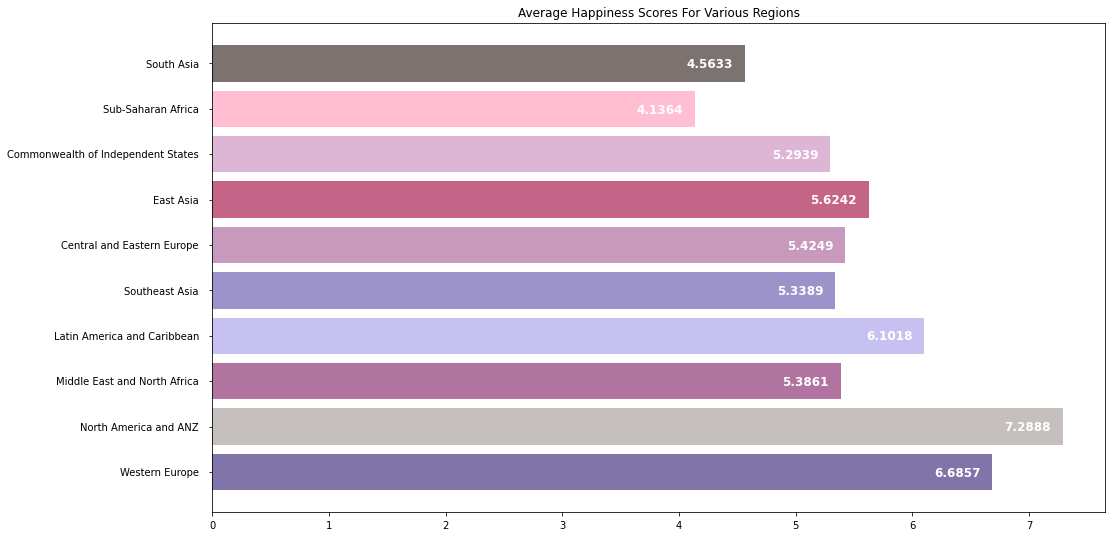

In [22]:
# Color per Plot
color=['#8074a8', '#c5bfbe', '#b173a0', '#c6c1f0', '#9b93c9', '#c799bc', '#c46487', '#ddb5d5', '#ffbed1', '#7c7270']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(RegionData['region'], 
        RegionData['score'], 
        color=color)

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()-0.5, i.get_y()+0.3,
             str(round((i.get_width()), 4)),
             fontsize = 12, fontweight ='bold',
             color ='white')

# Add Plot Title
ax.set_title(
    'Average Happiness Scores For Various Regions',
    loc ='center'
)
 
# Show Plot
plt.show()

From the graph we can see the most happiest region is North America and ANZ, and the least happiest region is Sub-Saharan Africa.

### Checking of Correlation Between Various Factors and Happiness Score(Scatter Plot)

#### Economy (GDP per Capita)

Data Calculation

In [23]:
x_axis=happy[['Happiness Score']]
y_axis=happy['Economy (GDP per Capita)']

Creation Of Graph

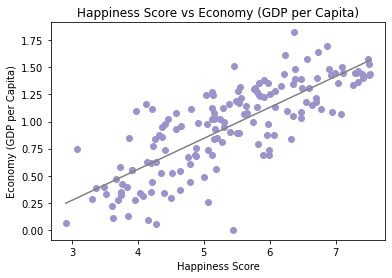

In [24]:
# Linear Regression
lrm = linear_model.LinearRegression()
lrm.fit(x_axis, y_axis)

# Plotting of Scatter plot and Linear Regression Line 
plt.scatter(x_axis, y_axis, color='#9b93c9')
plt.plot(x_axis, lrm.predict(x_axis),color='grey')

# Writing Title and Lables
plt.title("Happiness Score vs Economy (GDP per Capita)")
plt.xlabel("Happiness Score")
plt.ylabel("Economy (GDP per Capita)")

# Show Plot
plt.show()

From the above graph we can see that, the factor GDP has a strong positive correlation with Happiness Score.

#### Social Support

Data Calculation

In [25]:
x_axis=happy[['Happiness Score']]
y_axis=happy['Social Support']

Creation Of Graph

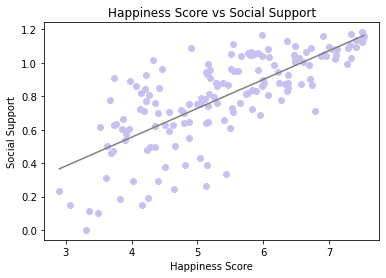

In [26]:
# Linear Regression
lrm = linear_model.LinearRegression()
lrm.fit(x_axis, y_axis)

# Plotting of Scatter plot and Linear Regression Line 
plt.scatter(x_axis, y_axis, color='#c6c1f0')
plt.plot(x_axis, lrm.predict(x_axis),color='grey')

# Writing Title and Lables
plt.title("Happiness Score vs Social Support")
plt.xlabel("Happiness Score")
plt.ylabel("Social Support")

# Show Plot
plt.show()

From the above graph we can see that, the factor Social Support also has a strong positive correlation with Happiness Score.

#### Health (Life Expectancy) 

Data Calculation

In [27]:
x_axis=happy[['Happiness Score']]
y_axis=happy['Health (Life Expectancy)']

Creation Of Graph

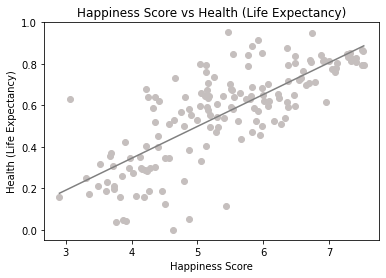

In [28]:
# Linear Regression
lrm = linear_model.LinearRegression()
lrm.fit(x_axis, y_axis)

# Plotting of Scatter plot and Linear Regression Line 
plt.scatter(x_axis, y_axis, color='#c5bfbe')
plt.plot(x_axis, lrm.predict(x_axis),color='grey')

# Writing Title and Lables
plt.title("Happiness Score vs Health (Life Expectancy)")
plt.xlabel("Happiness Score")
plt.ylabel("Health (Life Expectancy)")

# Show Plot
plt.show()

From the above graph we can see that, the factor Health (Life Expectancy) also has a strong positive correlation with Happiness Score.

#### Freedom

Data Calculation

In [29]:
x_axis=happy[['Happiness Score']]
y_axis=happy['Freedom']

Creation Of Graph

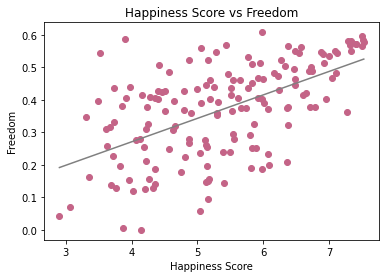

In [30]:
# Linear Regression
lrm = linear_model.LinearRegression()
lrm.fit(x_axis, y_axis)

# Plotting of Scatter plot and Linear Regression Line 
plt.scatter(x_axis, y_axis, color='#c46487')
plt.plot(x_axis, lrm.predict(x_axis),color='grey')

# Writing Title and Lables
plt.title("Happiness Score vs Freedom")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom")

# Show Plot
plt.show()

From the above graph we can see that, the factor Freedom also has a strong positive correlation with Happiness Score.

#### Trust (Government Corruption)

Data Calculation

In [31]:
x_axis=happy[['Happiness Score']]
y_axis=happy['Trust (Government Corruption)']

Creation Of Graph

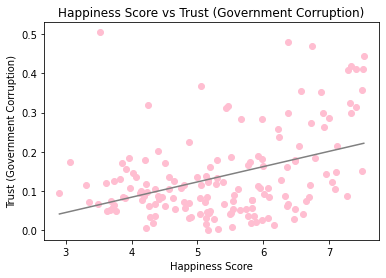

In [32]:
# Linear Regression
lrm = linear_model.LinearRegression()
lrm.fit(x_axis, y_axis)

# Plotting of Scatter plot and Linear Regression Line 
plt.scatter(x_axis, y_axis, color='#ffbed1')
plt.plot(x_axis, lrm.predict(x_axis),color='grey')

# Writing Title and Lables
plt.title("Happiness Score vs Trust (Government Corruption)")
plt.xlabel("Happiness Score")
plt.ylabel("Trust (Government Corruption)")

# Show Plot
plt.show()

From the above graph we can see that, the factor Trust (Government Corruption) has a weak positive correlation with Happiness Score.

#### Generosity

Data Calculation

In [33]:
x_axis=happy[['Happiness Score']]
y_axis=happy['Generosity']

Creation Of Graph

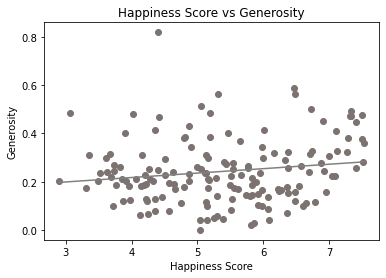

In [34]:
# Linear Regression
lrm = linear_model.LinearRegression()
lrm.fit(x_axis, y_axis)

# Plotting of Scatter plot and Linear Regression Line 
plt.scatter(x_axis, y_axis, color='#7c7270')
plt.plot(x_axis, lrm.predict(x_axis),color='grey')

# Writing Title and Lables
plt.title("Happiness Score vs Generosity")
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")

# Show Plot
plt.show()

From the above graph we can see that, the factor Generosity also has a weak positive correlation with Happiness Score.

## Prediction Of Happiness Score For An Imaginary Country (Custom Land)

Creation of Data Used For Training ML Model

In [35]:
X=happy[[
         "Economy (GDP per Capita)", 
         "Social Support", 
         "Health (Life Expectancy)", 
         "Freedom", 
         "Trust (Government Corruption)", 
         "Generosity"]]

Y=happy["Happiness Score"]

Creation of Linear Model and Fitting Data

In [36]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

Prediction Of Custom Land

In [52]:
gdp=float(input("Enter the GDP value of Custom Land: "))
social=float(input("Enter the Social Support Score of Custom Land: "))
health=float(input("Enter the Life Expectancy Score of Custom Land: "))
freedom=float(input("Enter the Freedom Score of Custom Land: "))
trust=float(input("Enter the Trust(Government Corruption) Score of Custom Land: "))
generosity=float(input("Enter the Generosity Score of Custom Land: "))

Custom_Land_Parameters=[[gdp, social, health, freedom, trust, generosity]]
Custom_Land_Happiness = lrm.predict(Custom_Land_Parameters)
Custom_Land_Happiness_Score = Custom_Land_Happiness[0]
print("The happiness Score Of Custom Land is", round(Custom_Land_Happiness_Score, 4))

Enter the GDP value of Custom Land: 0.76
Enter the Social Support Score of Custom Land: 0.65
Enter the Life Expectancy Score of Custom Land: 0.54
Enter the Freedom Score of Custom Land: 0.43
Enter the Trust(Government Corruption) Score of Custom Land: 0.32
Enter the Generosity Score of Custom Land: 0.21
The happiness Score Of Custom Land is 5.2921


Preparation Of Data

In [107]:
Score = np.array(happy['Happiness Score'])
Score = np.append(Score, Custom_Land_Happiness_Score)
Score = np.sort(Score)
Score = Score[::-1]
pos = np.where(Score == Custom_Land_Happiness_Score)
Country = np.array(happy['Country'])
Country = np.insert(Country, pos[0], ['Custom Land'])

Representation of Rank of The Custom Land

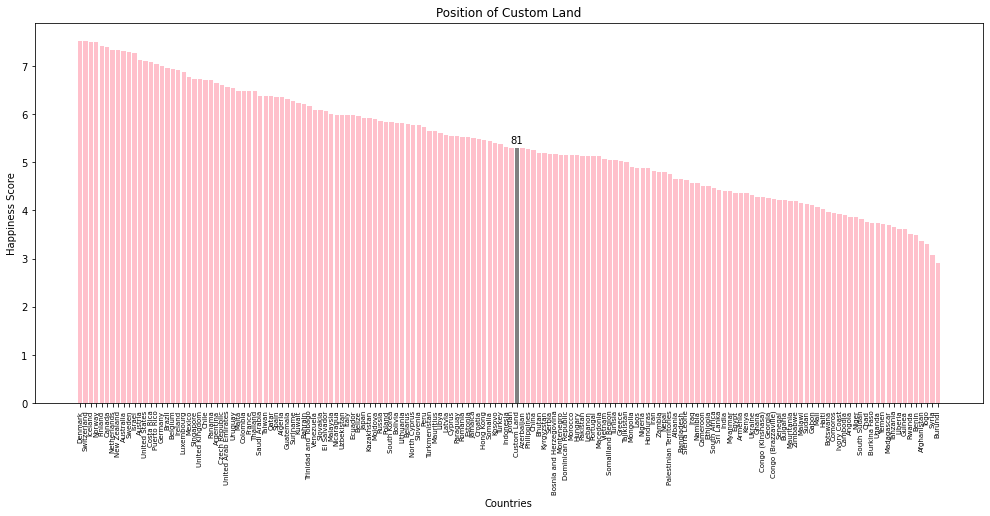

In [132]:
color = []
for x in Country:
    if x == 'Custom Land':
        color.append('grey')
    else:
        color.append('pink')
def addlabels(x,y):
    for i in range(len(x)):
        if i == pos[0]:
            plt.text(i, y[i]+0.1, i+1, ha = 'center')
# Figure Size
fig = plt.figure(figsize =(17, 7))
plt.xticks(fontsize=7, rotation=90)
plt.bar(Country, Score, color=color)
# calling the function to add value labels
addlabels(Country, Score)
      
# giving title to the plot
plt.title("Position of Custom Land")
      
# giving X and Y labels
plt.xlabel("Countries")
plt.ylabel("Happiness Score")
# Show Plot
plt.show()

In this graph we have predicted the Happiness Rank of the country Custom Land, by getting input of the various aspects from the user.